In [1]:
# data analysis on adult dataset
# focusing on working hours perweek and salary (boolean)
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
import numpy as np
import scipy.stats
df = pd.read_csv("adult.csv")
print(df)

       Age         Workclass  FinalWeight   Education  EducationNo  \
0       39         State-gov        77516   Bachelors           13   
1       50  Self-emp-not-inc        83311   Bachelors           13   
2       38           Private       215646     HS-grad            9   
3       53           Private       234721        11th            7   
4       28           Private       338409   Bachelors           13   
...    ...               ...          ...         ...          ...   
32556   27           Private       257302  Assoc-acdm           12   
32557   40           Private       154374     HS-grad            9   
32558   58           Private       151910     HS-grad            9   
32559   22           Private       201490     HS-grad            9   
32560   52      Self-emp-inc       287927     HS-grad            9   

            MaritalStatus         Occupation   Relationship   Race     Sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1  

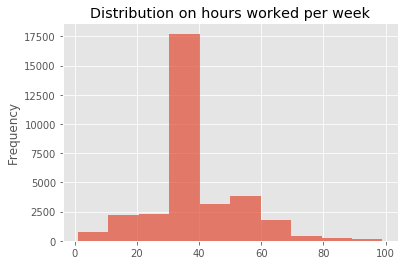

In [2]:
# a histogram on working hours. 
# This will show the overall distribution of working hours (per week) in the whole population.
plot1 = df['HoursPerWeek'].plot.hist(alpha=0.7, title="Distribution on hours worked per week")
# As we can see in the histogram, over half of the population works from 30-40 hours per week. 
# Those who works under 10 hours or over 70 hours are relatively rare.

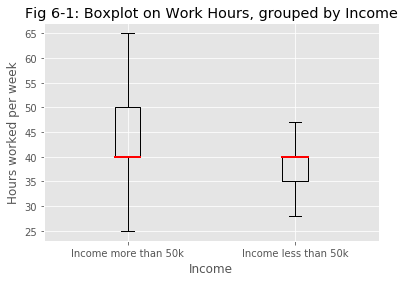

In [44]:
# a boxplot on working hours and salary
# This gives a side-to-side comparison on distribution of working hours perweek, based on whether the salary is over 50K per year.
# Box plot on working hours per week between groups - if the income was less than 50k or not
# outliers were omitted.
a = df[df["IncomeLessThan50k"] == True]['HoursPerWeek']
b = df[df["IncomeLessThan50k"] == False]['HoursPerWeek']
medianprops = dict(linestyle='-', linewidth=2, color='r')
labels = ['Income more than 50k', 'Income less than 50k']
boxdata = [b, a]
fig2, ax2 = plt.subplots(figsize=(6, 4))
ax2.set_title('Fig 6-1: Boxplot on Work Hours, grouped by Income')
ax2.set_xlabel('Income')
ax2.set_ylabel('Hours worked per week')
plot2 = ax2.boxplot(boxdata,showfliers=False, medianprops=medianprops, labels=labels)
#plt.gcf().set_size_inches(6, 4)
# Boxplot shows that although the median hours worked per week was exactly the same (40 hours per week), the distribution skews at opposite direction.
# In the group where income is less than 50k per year, we can see that more people are working less than 40 hours per week.
# On the other hand, in the group where income is more than 50k per year, more people are working more tha 50 hours per week.

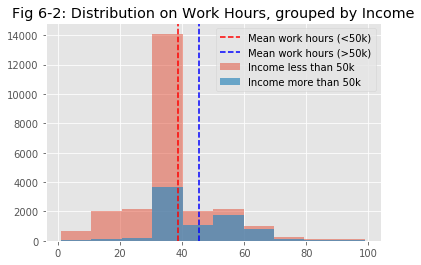

Mann-Whitney U = 63568779.000 pvalue = 0.00e+00


In [45]:
# a grouped histogram on working hour per week, grouped by whether salary is greater tha 50K per year

a = df[df["IncomeLessThan50k"] == True]['HoursPerWeek']
b = df[df["IncomeLessThan50k"] == False]['HoursPerWeek']
lessmean = np.mean(a)
moremean = np.mean(b)
plt.axvline(x=lessmean, label='Mean work hours (<50k)'.format(lessmean), c='r', linestyle='--')
plt.axvline(x=moremean, label='Mean work hours (>50k)'.format(moremean), c='b', linestyle='--')
plt.hist(a, alpha=0.5, label='Income less than 50k')
plt.hist(b, alpha=0.7, label='Income more than 50k')
plt.legend(loc='upper right')
plt.gcf().set_size_inches(6, 4)
plt.title("Fig 6-2: Distribution on Work Hours, grouped by Income")
plt.show()
print('Mann-Whitney U = %6.3f pvalue = %.2e' % scipy.stats.mannwhitneyu(a, b))
# In the grouped histogram, we can obeserve the same effect with magnitude. 
# Mann-Whitney U was used since both population were very skewed and thus violated the morality assumption of t-test.

In [15]:
# Heatmaps are powerful tools displaying magnitude of variable between groups
# In the following section, 4 heat maps are created comparing the effect of different groups on high/low income group's work hours.
# The hue of the heatmap refers to hours worked per week.
# Heatmap comparing hours worked in different income groups and Education
heatmap4_data = pd.pivot_table(df, values='HoursPerWeek', 
                     index=['Education'], 
                     columns='IncomeLessThan50k')

In [16]:
# Heatmap comparing hours worked in different income groups and occupation
heatmap5_data = pd.pivot_table(df, values='HoursPerWeek', 
                     index=['Occupation'], 
                     columns='IncomeLessThan50k')

In [17]:
# Heatmap comparing hours worked in different income groups and Relationship
heatmap6_data = pd.pivot_table(df, values='HoursPerWeek', 
                     index=['Relationship'], 
                     columns='IncomeLessThan50k')

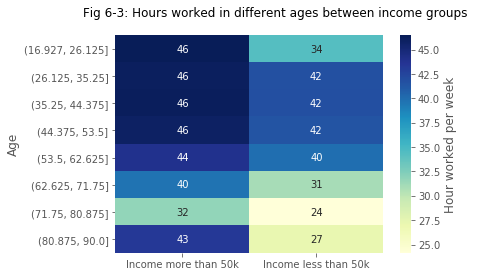

In [47]:
# Heatmap comparing hours worked in different income groups and Age
# This is the one heatmap used in system report
bin = pd.cut(df["Age"], 8)
heatmap7_data = pd.pivot_table(df, values='HoursPerWeek', 
                     index=bin, 
                     columns='IncomeLessThan50k')
fig, axes = plt.subplots()
fig.suptitle('Fig 6-3: Hours worked in different ages between income groups ')
xticklabels = ['Income more than 50k', 'Income less than 50k']
finalfig = sns.heatmap(heatmap7_data, annot=True, cmap="YlGnBu", cbar_kws={"label": "Hour worked per week"}, xticklabels=xticklabels).set(xlabel=None)

[Text(0.5, 69.00000000000009, '')]

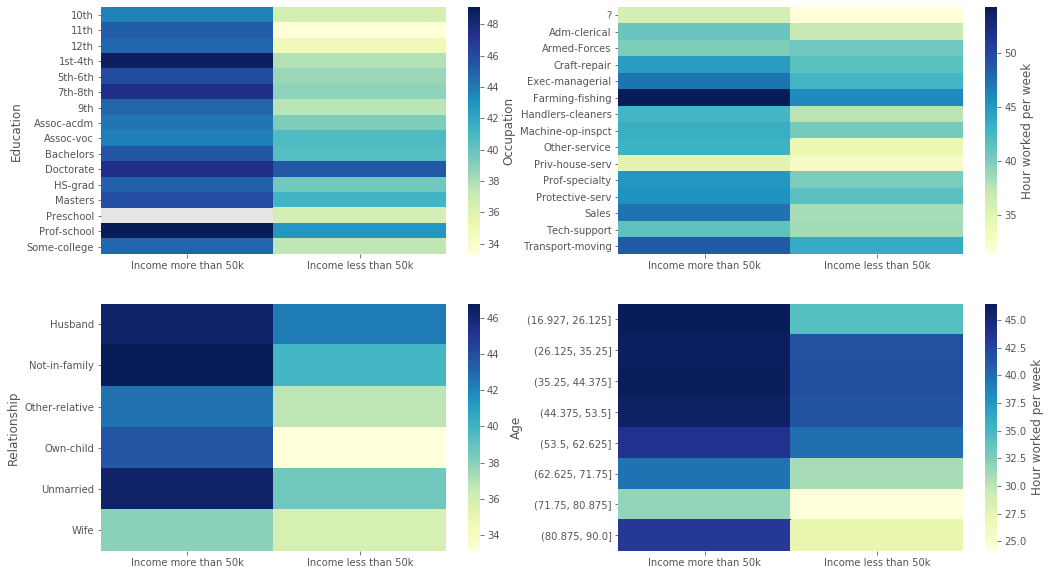

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(17, 10))

#fig.suptitle('Heatmaps comparing hours worked in across 2 income groups in association of other variables', fontsize = 22)
xticklabels = ['Income more than 50k', 'Income less than 50k']
sns.heatmap(heatmap4_data, cmap="YlGnBu", ax=axes[0, 0], xticklabels=xticklabels).set(xlabel=None)
sns.heatmap(heatmap5_data, cmap="YlGnBu", ax=axes[0, 1], xticklabels=xticklabels, cbar_kws={"label": "Hour worked per week"}).set(xlabel=None)
sns.heatmap(heatmap6_data, cmap="YlGnBu", ax=axes[1, 0], xticklabels=xticklabels).set(xlabel=None)
sns.heatmap(heatmap7_data, cmap="YlGnBu", ax=axes[1, 1], xticklabels=xticklabels, cbar_kws={"label": "Hour worked per week"}).set(xlabel=None)